# Метод Лагранжа

In [40]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import math

In [43]:
#лагранжева интерполяция
def lagrange_k(xval, xk, k):
    n = len(xk)
    num, den = 1.0, 1.0 
    for j in range(n):
        if j == k: 
            continue
        den *= (xk[k] - xk[j])
        num *= (xval - xk[j])
    return num / den

def lagrange(xval, xk, yk):
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))


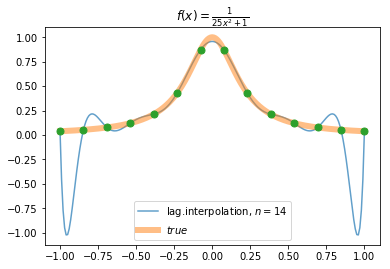

In [44]:
#графики    
def plot_(f, n, add_legend=True):
    xx = np.linspace(-1, 1, n)
    yy = f(xx)
    xn = np.linspace(-1, 1, 201)
    yn = [lagrange(_, xx, yy) for _ in xn]
    plt.plot(xn, yn, '-', alpha=0.7, label=r'lag.interpolation, $n= %s$' % n)
    plt.plot(xn, f(xn), label=r'$true$',lw=6, alpha=0.5)
    plt.plot(xx, yy, 'o', ms=7)
    plt.title('$f(x) = %s $' % sympy.printing.latex(f(sympy.Symbol('x'))))
    if add_legend:
        plt.legend(loc='best')

plot_(lambda x: 1/(1 + 25*x**2), 14)
plt.show()

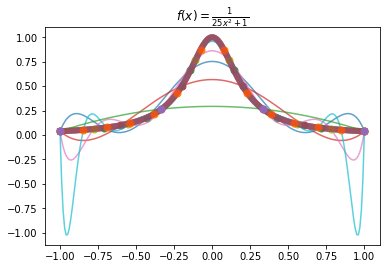

In [6]:
for n in [8, 6, 10, 14, 4]:
    plot_(lambda x: 1/(1 + 25*x**2), n, add_legend=False)
plt.show()


Лагранжева интерполяция при n=4,6,8,10,14

# Полиномы Чебышёва

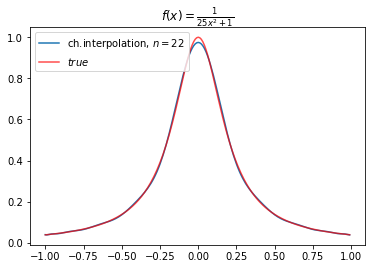

In [42]:
#Полиномы Чебышева + вывод графиков 
def plot_ch(f,n, add_legend=True) :
    xx = np.arange(-1, 1, 0.01)
    chx = [math.cos((2 * xx + 1) / 2 / n * math.pi) for xx in range(n)]
    chy = [f(xx) for xx in chx]

    plt.plot(xx, lagrange(xx, chx, chy), label=r'сh.interpolation, $n= %s$' % n)
    plt.plot(xx, f(xx), 'r', label=r'$true$', alpha=0.7)
    plt.title('$f(x) = %s $' % sympy.printing.latex(f(sympy.Symbol('x'))))
    if add_legend:
        plt.legend(loc='best')
plot_ch(lambda x: 1/(1 + 25*x**2),22)
plt.show()

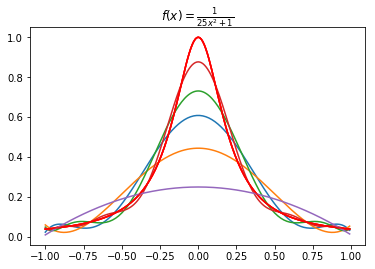

In [31]:
for n in [8, 6, 10, 14, 4]:
    plot_ch(lambda x: 1/(1 + 25*x**2), n, add_legend=False)
plt.show()

Лагранжева интерполяция при n=4,6,8,10,14


# Сравнение полиномов Чебышева и Лагранжевой интерполяции

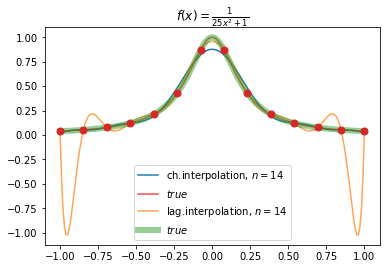

In [39]:
plot_ch(lambda x: 1/(1 + 25*x**2), 14)
plot_(lambda x: 1/(1 + 25*x**2), 14)
plt.show()

В итоге, при данном n Чебышев подходит лучше 

# Вывод

При больших n в методе Лагранжа и в полиномах Чебышева появляются сильные отклонения на краях. Возможное решение проблемы - использовать не глобальную интерполяцию, а сплайны